We are going to start by trying to reproduce what's in the repo. We notice that below we get an error and the mnist dataset does not download. This is annoying. 

In [10]:
import rpy2.robjects as robjects
import pandas as pd

# Define the path to your .rds file
rds_path = '../data/cytof/marie_processed/processed_surface.rds'

# Load the .rds file
readRDS = robjects.r['readRDS']
cells = readRDS(rds_path)

# Convert R data to a Python-friendly format (if needed)
# This depends on the type of data stored in the .rds file
# For example, if it's a dataframe, you might convert it to a pandas dataframe:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

cells = pandas2ri.rpy2py(cells)

# Subsample
num_cells = 5000
cells = cells.values[:num_cells]




Ok, we have CyTOF data in python. Great. Now let's try to run the other stuff.

Computing approximate kNN graph with annoy


Finished epoch 0/200, loss 16166.133
Finished epoch 40/200, loss 16547.125
Finished epoch 80/200, loss 5617.045
Finished epoch 120/200, loss 5234.588
Finished epoch 160/200, loss 5049.193
/var/folders/6y/qgvrbn_j2v35vfy946hlhh9c0000gn/T/ipykernel_98999/4170529912.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*embd.T, alpha=0.5, s=10.0, cmap="tab10", edgecolor="none")


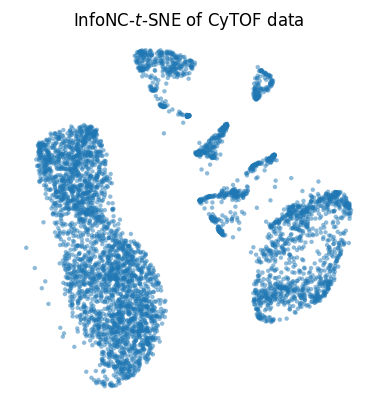

In [11]:
# default CNE (using the InfoNCE loss)
import cne
import matplotlib.pyplot as plt

embedder = cne.CNE()
embd = embedder.fit_transform(cells) # needs to be a np array

plt.figure()
plt.scatter(*embd.T, alpha=0.5, s=10.0, cmap="tab10", edgecolor="none")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title(r"InfoNC-$t$-SNE of CyTOF data")
plt.show()

Ok. This will do. Now we have to figure out what to adjust to make it look more like UMAP.

Computing approximate kNN graph with annoy


Finished epoch 0/200, loss 65380.362
Finished epoch 40/200, loss 59532.409
Finished epoch 80/200, loss 29128.510
Finished epoch 120/200, loss 27748.990
Finished epoch 160/200, loss 27045.552


Computing approximate kNN graph with annoy


Finished epoch 0/200, loss 65380.362
Finished epoch 40/200, loss 59532.409
Finished epoch 80/200, loss 35194.755
Finished epoch 120/200, loss 31230.611
Finished epoch 160/200, loss 28960.757


Computing approximate kNN graph with annoy


Finished epoch 0/200, loss 65380.362
Finished epoch 40/200, loss 59532.409
Finished epoch 80/200, loss 52282.745
Finished epoch 120/200, loss 44255.060
Finished epoch 160/200, loss 36623.772
/var/folders/6y/qgvrbn_j2v35vfy946hlhh9c0000gn/T/ipykernel_98999/3420164306.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i].scatter(*neg_embeddings[s].T, alpha=0.5, s=10.0, cmap="tab10", edgecolor="none")


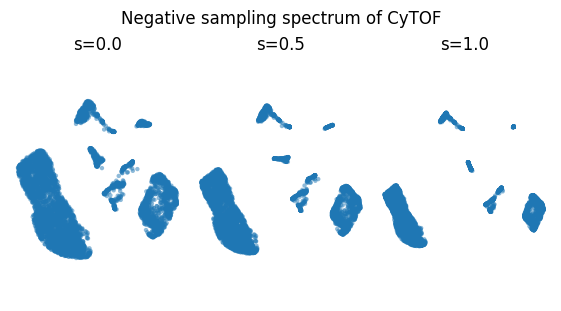

In [12]:
# compute spectrum with negative sampling loss
spec_params = [0.0, 0.5, 1.0]

neg_embeddings = {}
for s in spec_params:
    embedder = cne.CNE(loss_mode="neg",
                       s=s)
    embd = embedder.fit_transform(cells)
    neg_embeddings[s] = embd

# plot embeddings
fig, ax = plt.subplots(1, len(spec_params), figsize=(5.5, 3), constrained_layout=True)
for i, s in enumerate(spec_params):
    ax[i].scatter(*neg_embeddings[s].T, alpha=0.5, s=10.0, cmap="tab10", edgecolor="none")
    ax[i].set_aspect("equal", "datalim")
    ax[i].axis("off")
    ax[i].set_title(f"s={s}")

fig.suptitle("Negative sampling spectrum of CyTOF")
plt.show()

How much can we push this?

Computing approximate kNN graph with annoy


Finished epoch 0/200, loss 65380.362
Finished epoch 40/200, loss 59532.409
Finished epoch 80/200, loss 182868.182
Finished epoch 120/200, loss 118339.690
Finished epoch 160/200, loss 104676.047


Computing approximate kNN graph with annoy


Finished epoch 0/200, loss 168957.186
Finished epoch 40/200, loss 177087.568
Finished epoch 80/200, loss 166822.951
Finished epoch 120/200, loss 153742.761
Finished epoch 160/200, loss 137757.646
/var/folders/6y/qgvrbn_j2v35vfy946hlhh9c0000gn/T/ipykernel_98999/83573591.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i].scatter(*neg_embeddings[s].T, alpha=0.5, s=10.0, cmap="tab10", edgecolor="none")


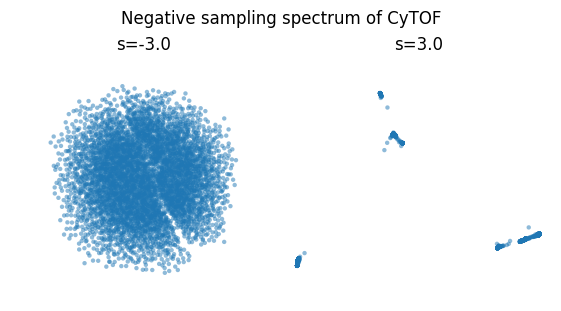

In [15]:
import cne 
import matplotlib.pyplot as plt

# compute spectrum with negative sampling loss
spec_params = [-3.0, 3.0]

neg_embeddings = {}
for s in spec_params:
    embedder = cne.CNE(loss_mode="neg",
                       s=s)
    embd = embedder.fit_transform(cells)
    neg_embeddings[s] = embd

# plot embeddings
fig, ax = plt.subplots(1, len(spec_params), figsize=(5.5, 3), constrained_layout=True)
for i, s in enumerate(spec_params):
    ax[i].scatter(*neg_embeddings[s].T, alpha=0.5, s=10.0, cmap="tab10", edgecolor="none")
    ax[i].set_aspect("equal", "datalim")
    ax[i].axis("off")
    ax[i].set_title(f"s={s}")

fig.suptitle("Negative sampling spectrum of CyTOF")
plt.show()

Ok, now we're getting somewhere. We just have to put some work into this. We're going to make a new md now for the gif creation.